<a href="https://www.kaggle.com/code/gregkoja/properties-of-metals-eda?scriptVersionId=219108556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Properties of Metals**

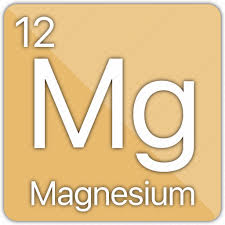

## Exploratory Data Analysis
### Data Visualization includes matplotlib, seaborn, and bokeh plots

#### This notebook provides insights into the different properties of metals including their atomic weight, density, and thermal and electrical properties. 

#### I originally copied and pasted the data into excel from the FE Chemical Handbook without completing a quick initial comb of the data or formatting. 
#### Thus, this data is exceptional for discovering how to convert data to the correct datatype for visualization while handling negatives values, random white space, commas in numbers, and missing data. 


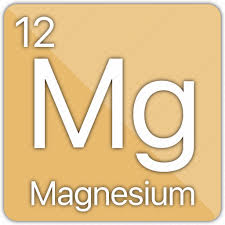

## Data Loading

In [1]:
#Print path of Properties of Metals CSV 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/properties-of-metals-from-ncees-fe-handbook/Properties of Metals.csv


In [2]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.layouts import column

warnings.simplefilter('ignore')

#Load data 
data_path = '/kaggle/input/properties-of-metals-from-ncees-fe-handbook/Properties of Metals.csv'
df  = pd.read_csv(data_path, delimiter=',', thousands=',')

#Display dataframe to ensure properly loaded
df.head()

,Metal,Symbol,Atomic Weight,Density ρ (kg/m3) Water = 1000,Melting Point (°C),Melting Point (°F),Specific Heat (J/(kg˙K)),Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K),Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)
0,Aluminum,Al,26.980,2698,660,"1,220",895.9,2.5,236
1,Antimony,Sb,121.750,6692,630,"1,166",209.3,39.0,25.5
2,Arsenic,As,74.920,5776,subl. 613,"subl. 1,135",347.5,26.0,−
3,Barium,Ba,137.330,3594,710,"1,310",284.7,36.0,−
4,Beryllium,Be,9.012,1846,"1,285","2,345","2,051.50",2.8,218


#### No null values within the dataframe. Note '-' for missing data. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Metal                                               46 non-null     object 
 1   Symbol                                              46 non-null     object 
 2   Atomic Weight                                       46 non-null     float64
 3   Density ρ (kg/m3) Water = 1000                      46 non-null     int64  
 4   Melting Point (°C)                                  46 non-null     object 
 5   Melting Point (°F)                                  46 non-null     object 
 6   Specific Heat (J/(kg˙K))                            46 non-null     object 
 7   Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K)  46 non-null     float64
 8   Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)      46 non-null     object 
dtypes:

# Data Cleaning

#### We see 'Metal' and 'Symbol' are categorical and dtype 'object'. 
#### All other columns should be numerical for data visualization 

#### We need to convert all the object type columns to numeric columns. 

In [4]:
df.dtypes

Metal                                                  object
Symbol                                                 object
Atomic Weight                                         float64
Density ρ (kg/m3) Water = 1000                          int64
Melting Point (°C)                                     object
Melting Point (°F)                                     object
Specific Heat (J/(kg˙K))                               object
Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K)    float64
Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)         object
dtype: object

#### Sublimation is the transition of a substance from a solid to a gas state, without passing through the liquid state. 

#### Arsenic has a sublimation temperature included in its Melting Point denoted as subl. we need to remove for analysis. 

In [5]:
# Remove 'subl.' from Melting Point values
df['Melting Point (°C)'] = df['Melting Point (°C)'].str.replace('subl. ', '')
df['Melting Point (°F)'] = df['Melting Point (°F)'].str.replace('subl. ', '')

#### Converting Melting Point, Specific Heat, and Heat Conductivity to numeric data types. 

In [6]:
# List of columns to convert
columns_to_convert = [
    'Melting Point (°F)',
    'Melting Point (°C)',
    'Specific Heat (J/(kg˙K))',
    'Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)'
]

# Loop through columns and convert to numeric values
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
    
# Display dataframe to ensure proper conversion
df

,Metal,Symbol,Atomic Weight,Density ρ (kg/m3) Water = 1000,Melting Point (°C),Melting Point (°F),Specific Heat (J/(kg˙K)),Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K),Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)
0,Aluminum,Al,26.980,2698,660.0,1220.0,895.9,2.50,236.0
1,Antimony,Sb,121.750,6692,630.0,1166.0,209.3,39.00,25.5
2,Arsenic,As,74.920,5776,613.0,1135.0,347.5,26.00,NaN
3,Barium,Ba,137.330,3594,710.0,1310.0,284.7,36.00,NaN
4,Beryllium,Be,9.012,1846,1285.0,2345.0,2051.5,2.80,218.0
5,Bismuth,Bi,208.980,9803,271.0,519.0,125.6,107.00,8.2
6,Cadmium,Cd,112.410,8647,321.0,609.0,234.5,6.80,97.0
7,Caesium,Cs,132.910,1900,29.0,84.0,217.7,18.80,36.0
8,Calcium,Ca,40.080,1530,840.0,1544.0,636.4,3.20,NaN
9,Cerium,Ce,140.120,6711,800.0,1472.0,188.4,7.30,11.0


In [7]:
#Verify data types converted properly
df.dtypes

Metal                                                  object
Symbol                                                 object
Atomic Weight                                         float64
Density ρ (kg/m3) Water = 1000                          int64
Melting Point (°C)                                    float64
Melting Point (°F)                                    float64
Specific Heat (J/(kg˙K))                              float64
Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K)    float64
Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)        float64
dtype: object

In [8]:
#Check for NAN values
df.isna().sum()

Metal                                                 0
Symbol                                                0
Atomic Weight                                         0
Density ρ (kg/m3) Water = 1000                        0
Melting Point (°C)                                    1
Melting Point (°F)                                    1
Specific Heat (J/(kg˙K))                              1
Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K)    0
Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)        4
dtype: int64

## Filling in missing values

#### Due to formatting issues with pd.to_numeric there are NAN values in the Melting Point of Mercury. These values are in the original data set. Updated the -39.00 and -38.00 in cell below.

#### We have one (1) Specific Heat NAN value to update for Strontium since it was not in the original dataset.

#### We have four (4) Heat Conductivity NAN values that also need updated for Arsenic, Barium, Strontium, and Calcium not in the original dataset. 

#### Citing https://periodictable.com/Elements/038/data.html for metal's values to be used in the update of the NAN values for a complete dataset. 

In [9]:
#Due to issues with pd.to_numeric, we will update the -39 and -38 values with -39.00 and -38.00 for Mercury
df.at[22, 'Melting Point (°F)'] = -38.00
df.at[22, 'Melting Point (°C)'] = -39.00

#Updating NAN values with values from the cited source, not in the original dataset

#Strontium
df.at[35, 'Specific Heat (J/(kg˙K))'] = 300
df.at[35, 'Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)'] = 35

#Arsenic, Barium, and Calcium respectively
df.at[2, 'Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)'] = 50
df.at[3, 'Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)'] = 18
df.at[8, 'Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)'] = 200

df

,Metal,Symbol,Atomic Weight,Density ρ (kg/m3) Water = 1000,Melting Point (°C),Melting Point (°F),Specific Heat (J/(kg˙K)),Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K),Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)
0,Aluminum,Al,26.980,2698,660.0,1220.0,895.9,2.50,236.0
1,Antimony,Sb,121.750,6692,630.0,1166.0,209.3,39.00,25.5
2,Arsenic,As,74.920,5776,613.0,1135.0,347.5,26.00,50.0
3,Barium,Ba,137.330,3594,710.0,1310.0,284.7,36.00,18.0
4,Beryllium,Be,9.012,1846,1285.0,2345.0,2051.5,2.80,218.0
5,Bismuth,Bi,208.980,9803,271.0,519.0,125.6,107.00,8.2
6,Cadmium,Cd,112.410,8647,321.0,609.0,234.5,6.80,97.0
7,Caesium,Cs,132.910,1900,29.0,84.0,217.7,18.80,36.0
8,Calcium,Ca,40.080,1530,840.0,1544.0,636.4,3.20,200.0
9,Cerium,Ce,140.120,6711,800.0,1472.0,188.4,7.30,11.0


In [10]:
#verify NAN values have been updated
df.isna().sum()

Metal                                                 0
Symbol                                                0
Atomic Weight                                         0
Density ρ (kg/m3) Water = 1000                        0
Melting Point (°C)                                    0
Melting Point (°F)                                    0
Specific Heat (J/(kg˙K))                              0
Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K)    0
Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)        0
dtype: int64

### We now have a complete set of numerical values for all the attributes of the metals. 

In [11]:
# Get descriptive statistics for numerical columns
df.describe()

,Atomic Weight,Density ρ (kg/m3) Water = 1000,Melting Point (°C),Melting Point (°F),Specific Heat (J/(kg˙K)),Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K),Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,108.741761,8841.478261,1149.534783,2100.956522,467.806522,18.758043,100.271739
std,65.324708,6020.603180,916.495552,1649.726455,711.435984,27.581195,95.836253
min,6.940000,533.000000,-39.000000,-38.000000,117.200000,1.470000,7.800000
25%,56.560000,4825.000000,322.500000,611.750000,160.125000,5.125000,35.250000
50%,98.505000,7673.000000,1012.500000,1853.500000,270.000000,9.355000,77.750000
75%,170.742500,11834.500000,1754.000000,3188.750000,437.500000,18.650000,133.500000
max,238.030000,22580.000000,3387.000000,6128.000000,4576.200000,138.000000,428.000000


In [12]:
#Updating Columns Name to make more aesthetically pleasing
# Rename specific columns
df.rename(columns={
    'Density ρ (kg/m3) Water = 1000': 'Density',
    'Specific Heat (J/(kg˙K))': 'Specific Heat',
    'Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K)': 'Electrical Resistivity',
    'Heat Conductivity λ (W/(m˙K)) at 0°C (273.2 K)': 'Heat Conductivity'
}, inplace=True)

# Data Visualization

### Sort by Atomic Weight

In [13]:
df_sorted = df.sort_values(by='Atomic Weight')
df_sorted.head()

,Metal,Symbol,Atomic Weight,Density,Melting Point (°C),Melting Point (°F),Specific Heat,Electrical Resistivity,Heat Conductivity
19,Lithium,Li,6.940,533,180.0,356.0,4576.2,8.55,86.0
4,Beryllium,Be,9.012,1846,1285.0,2345.0,2051.5,2.80,218.0
34,Sodium,Na,22.989,966,97.8,208.0,1235.1,4.20,142.0
20,Magnesium,Mg,24.310,1738,650.0,1202.0,1046.7,3.94,157.0
0,Aluminum,Al,26.980,2698,660.0,1220.0,895.9,2.50,236.0


## Plot Atomic Weight and Density of each Element

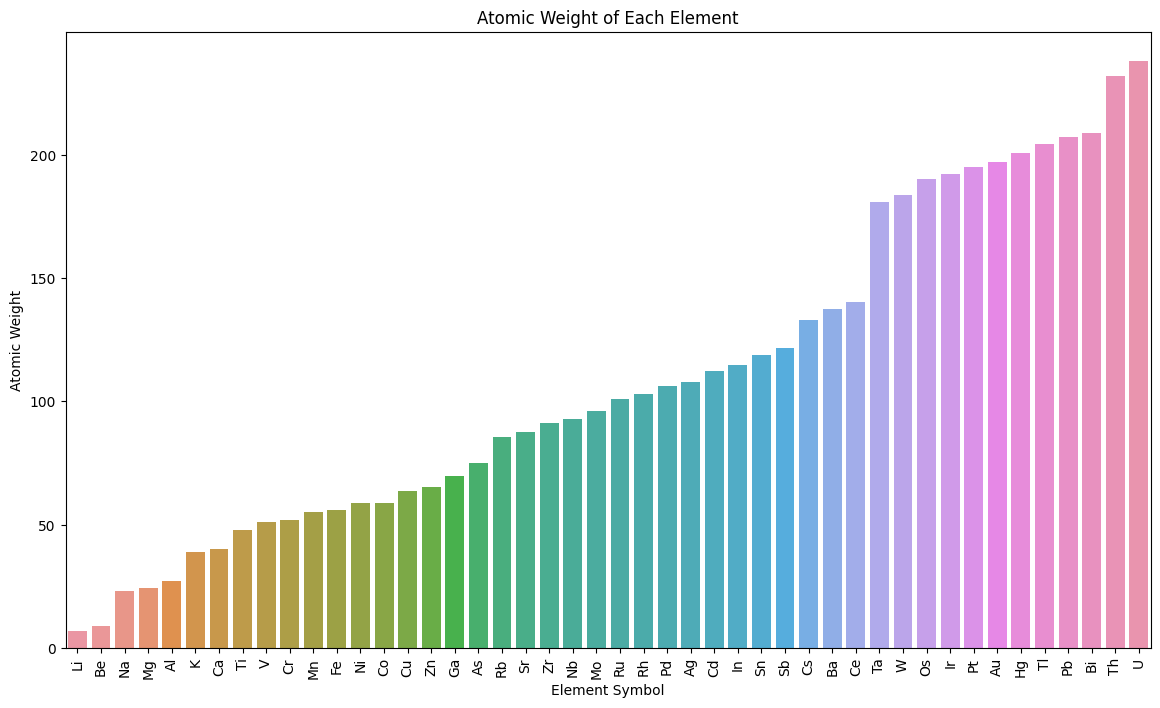

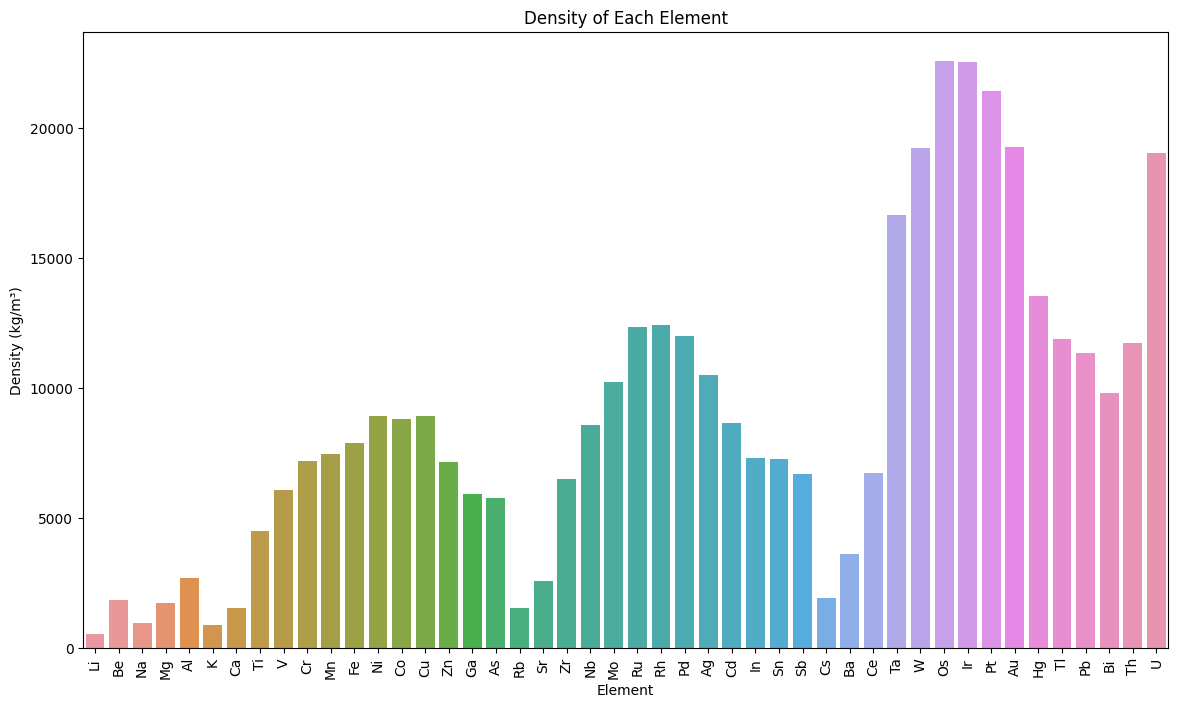

In [14]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Symbol', y='Atomic Weight', data=df_sorted)
plt.xticks(rotation=90)
plt.xlabel('Element Symbol')
plt.ylabel('Atomic Weight')
plt.title('Atomic Weight of Each Element')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Symbol', y='Density', data=df_sorted)
plt.xticks(rotation=90)
plt.xlabel('Element')
plt.ylabel('Density (kg/m³)')
plt.title('Density of Each Element')
plt.show()

### intuitively, you would except as atomic weight increases, we would see an increase in density. 
### but
### when viewing the chart, it shows this is not the case. 
### The atomic radius and electron configuration significantly influence how tightly the atoms are packed, causing variations in the density across the metals.

## Density
## $\rho = m/v$ 

### thus, it is not just the atomic mass, but how much space the atomic mass occupies. 

## Plotting Specific Heat, Electrical Conductivity, Heat Conductivity, and Melting Point versus increasing Atomic Weight with **Interactive** Bokeh Plots

In [15]:
# Configure Bokeh to output inline in the notebook
output_notebook()

# Create a ColumnDataSource from the DataFrame
source = ColumnDataSource(df_sorted)

# Function to create a line plot with labels
def create_line_plot(x, y, y_label, title):
    p = figure(title=title, x_axis_label='Atomic Weight', y_axis_label=y_label, width=700, height=400)
    p.line(x='Atomic Weight', y=y, source=source, line_width=2)
    p.circle(x='Atomic Weight', y=y, source=source, size=10, fill_color="white")
    
    labels = LabelSet(x='Atomic Weight', y=y, text='Symbol', level='glyph', x_offset=5, y_offset=5, source=source)
    p.add_layout(labels)
    
    return p

# Create the plots
p1 = create_line_plot('Atomic Weight', 'Specific Heat', 'Specific Heat (J/(kg˙K))', 'Specific Heat vs Atomic Weight')
p2 = create_line_plot('Atomic Weight', 'Electrical Resistivity', 'Electrical Resistivity (10−8 Ω˙m) at 0°C (273.2 K)', 'Electrical Resistivity vs Atomic Weight')
p3 = create_line_plot('Atomic Weight', 'Heat Conductivity', 'Heat Conductivity (W/(m˙K)) at 0°C (273.2 K)', 'Heat Conductivity vs Atomic Weight')
p4 = create_line_plot('Atomic Weight', 'Melting Point (°C)', 'Melting Point (°C)', 'Melting Point (°C) vs Atomic Weight')

# Display the plots in a column layout
show(column(p1, p2, p3, p4))

Loading BokehJS ...

### There is a clear trend of Specific Heat decreasing as Atomic Weight increases. 
### Electrical Resistivity and Heat Conductivity clearly show some outliers. 
### The Melting Point of the metals has increasing larger fluctuations with increasing atomic weight. 

## Create histograms to understand frequency of distributions of the elements and their properties using seaborn. 

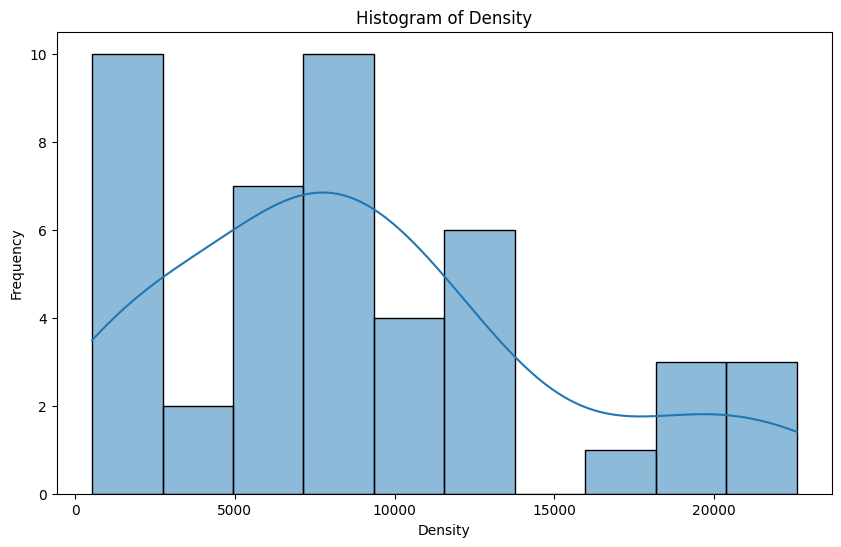

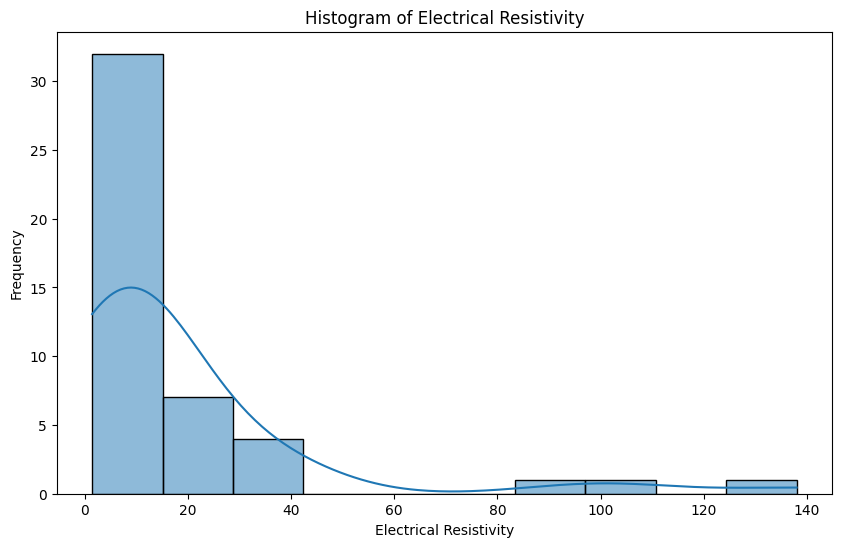

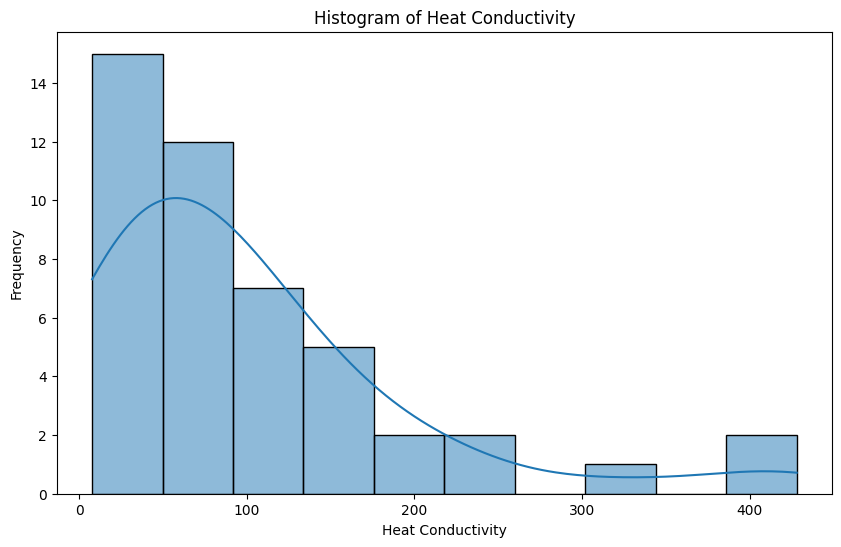

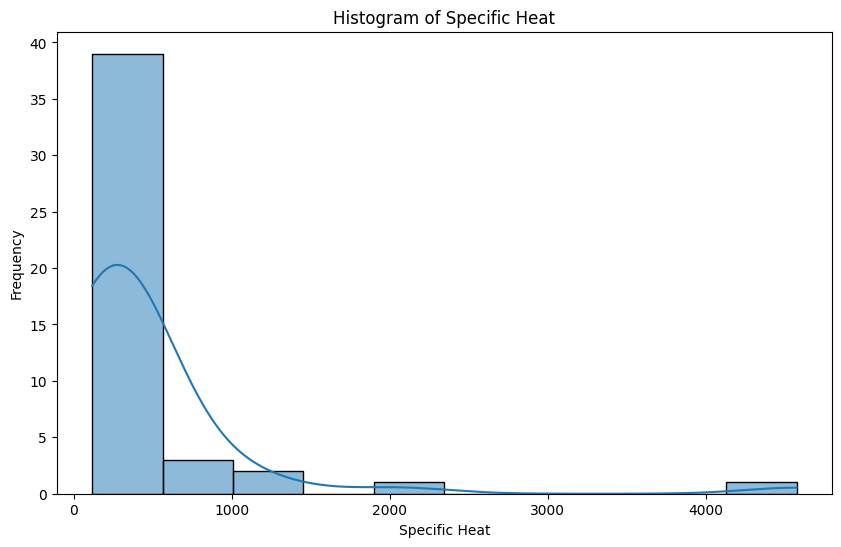

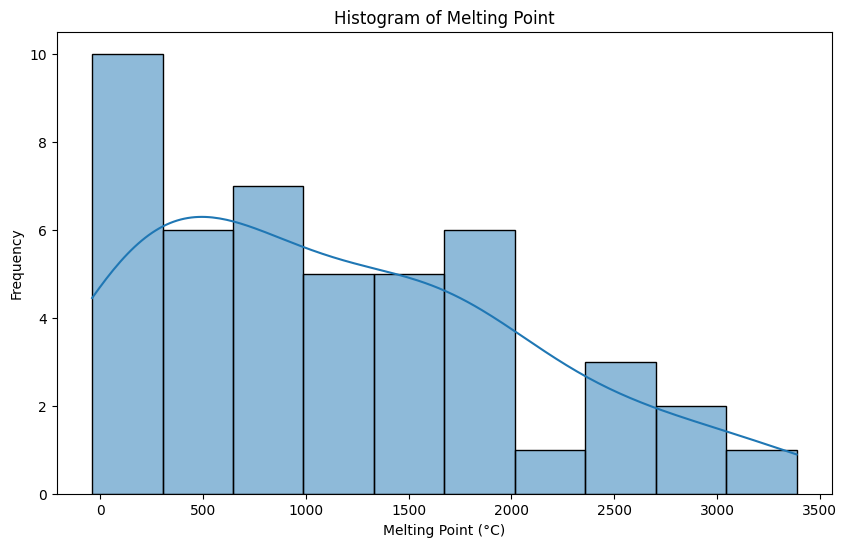

In [16]:
# Create a histogram of the Density
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['Density'], bins=10, kde=True)
plt.title('Histogram of Density')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

# Create a histogram of the Electrical Resistivity
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['Electrical Resistivity'], bins=10, kde=True)
plt.title('Histogram of Electrical Resistivity')
plt.xlabel('Electrical Resistivity')
plt.ylabel('Frequency')
plt.show()

# Create a histogram of the Heat Conductivity
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['Heat Conductivity'], bins=10, kde=True)
plt.title('Histogram of Heat Conductivity')
plt.xlabel('Heat Conductivity')
plt.ylabel('Frequency')
plt.show()

# Create a histogram of the Specific Heat
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['Specific Heat'], bins=10, kde=True)
plt.title('Histogram of Specific Heat')
plt.xlabel('Specific Heat')
plt.ylabel('Frequency')
plt.show()

# Create a histogram of the Melting Point
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['Melting Point (°C)'], bins=10, kde=True)
plt.title('Histogram of Melting Point')
plt.xlabel('Melting Point (°C)')
plt.ylabel('Frequency')
plt.show()

## **Analysis**
### Majority of the metals have a density less than 15000 (kg/m3)
### Majority of the metals have an electrical resistivity around 10 and less than 30 (10−8 Ω˙m) at 0°C (273.2 K)
### Majority of the metals have a heat conductivity λ around 60 (W/(m˙K)) at 0°C (273.2 K)
### Majority of the metals have a Specific Heat around 250 (J/(kg˙K))
### Majority of the metals Melting Points are less than 2000 degrees celsius.


# Determine if the previous graphs are truly statistical outliers with box plots

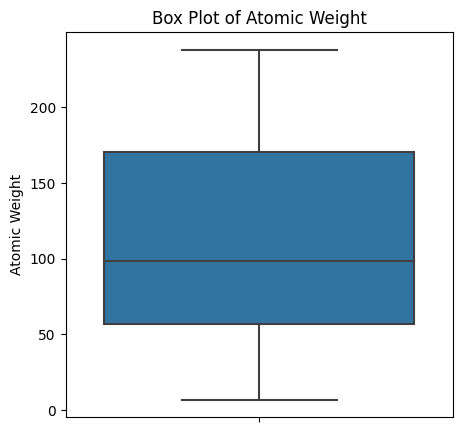

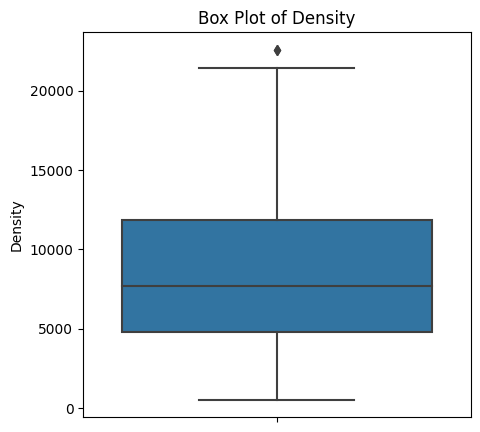

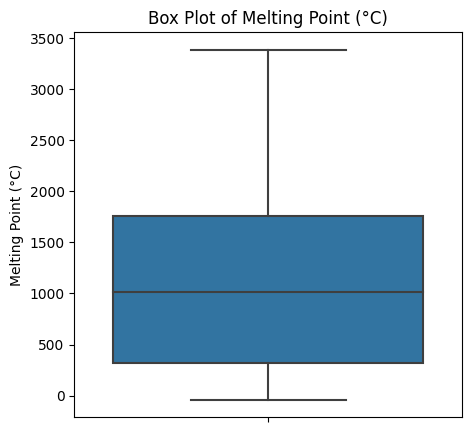

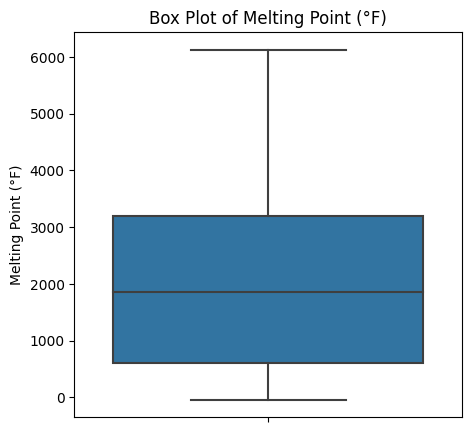

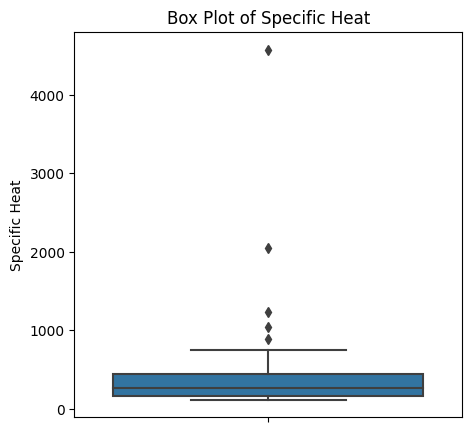

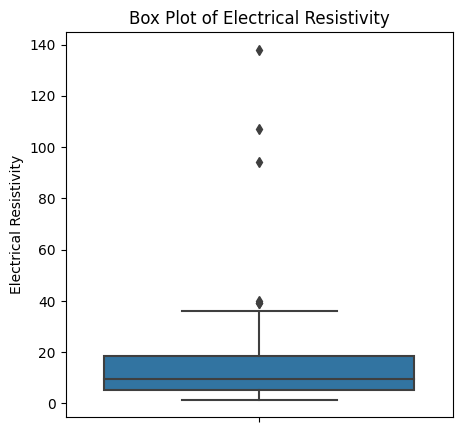

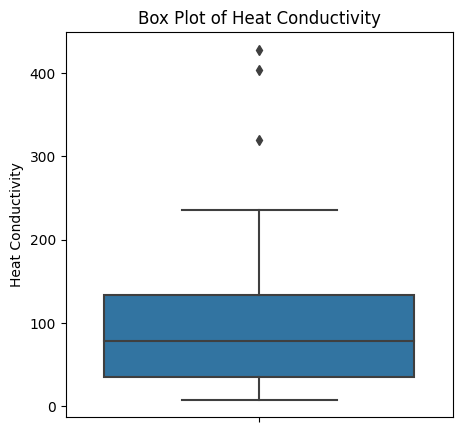

In [17]:
# Select only numerical columns
numerical_df = df_sorted.select_dtypes(include=['number'])

# Plot each column as a box plot
for col in numerical_df.columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=numerical_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.autoscale
    plt.show()

## The box plots show we have some statistical outliers. Let's determine which values they are using IQR method. 

In [18]:
# Function to identify outliers using IQR method and classify them as high or low
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers['Outlier Type'] = outliers[column].apply(lambda x: 'Low' if x < lower_bound else 'High')
    return outliers

In [19]:
# Initialize an empty list to store outliers information
outliers_info = []

# Loop through each numerical column and find outliers
numerical_df = df_sorted.select_dtypes(include=['number'])

for col in numerical_df.columns:
    outliers = identify_outliers(df_sorted, col)
    for index, row in outliers.iterrows():
        outliers_info.append({
            'Element': row['Metal'],
            'Column': col,
            'Value': row[col],
            'Outlier Type': row['Outlier Type']
        })

# Convert the list of outliers information to a DataFrame
outliers_df = pd.DataFrame(outliers_info)

# Display the DataFrame with outliers information
print(outliers_df)

      Element                  Column    Value Outlier Type
0      Osmium                 Density  22580.0         High
1     Iridium                 Density  22550.0         High
2     Lithium           Specific Heat   4576.2         High
3   Beryllium           Specific Heat   2051.5         High
4      Sodium           Specific Heat   1235.1         High
5   Magnesium           Specific Heat   1046.7         High
6    Aluminum           Specific Heat    895.9         High
7    Titanium  Electrical Resistivity     39.0         High
8   Manganese  Electrical Resistivity    138.0         High
9   Zirconium  Electrical Resistivity     40.0         High
10   Antimony  Electrical Resistivity     39.0         High
11    Mercury  Electrical Resistivity     94.1         High
12    Bismuth  Electrical Resistivity    107.0         High
13     Copper       Heat Conductivity    403.0         High
14     Silver       Heat Conductivity    428.0         High
15       Gold       Heat Conductivity   

#### Above represents the chart of metals that are considered outliers in their respective property using the IQR method. 

#### Charting the max and min of each property with the respective metal. 

In [20]:
# Select only numerical columns
numerical_df = df_sorted.select_dtypes(include=['number'])

# List to store the max and min values along with the element names
max_min_list = []

# Loop through each numerical column and find the max and min values along with the element names
for col in numerical_df.columns:
    max_value = numerical_df[col].max()
    min_value = numerical_df[col].min()
    max_element = df_sorted.loc[numerical_df[col].idxmax(), 'Metal']
    min_element = df_sorted.loc[numerical_df[col].idxmin(), 'Metal']
    max_min_list.append({
        'Column': col,
        'Max Value': max_value,
        'Max Element': max_element,
        'Min Value': min_value,
        'Min Element': min_element
    })

# Convert the list of dictionaries to a DataFrame
max_min_df = pd.DataFrame(max_min_list)

# Display the DataFrame with max and min values along with the element names
max_min_df.T

,0,1,2,3,4,5,6
Column,Atomic Weight,Density,Melting Point (°C),Melting Point (°F),Specific Heat,Electrical Resistivity,Heat Conductivity
Max Value,238.03,22580.0,3387.0,6128.0,4576.2,138.0,428.0
Max Element,Uranium,Osmium,Tungsten,Tungsten,Lithium,Manganese,Silver
Min Value,6.94,533.0,-39.0,-38.0,117.2,1.47,7.8
Min Element,Lithium,Lithium,Mercury,Mercury,Thorium,Silver,Mercury


# Outlier Results

## Density

#### Osmium is actually considered the densest element of the periodic table. Iridium second. These two elements are so dense thanks to their atomic structure allowing for a small atomic radius. This is due to the configuration of their f-orbitial electrons being contracted by the atomic nucleus. Additionally, their hexagonal crystal structure is highly efficient and their strong metallic bonds enable these metals to maximize their density. 
#### Osmium Electron Configuration Xe 4f14 5d6 6s2
#### Iridium Electron Configuration Xe 4f14 5d7 6s2

#### Lithium with an atomic number of 3 is the lightest solid element and metal. 
#### Lithium Electron Configuration 1s2 2s1

## Specific Heat 

#### Lithium has a small atomic nucleus of only 3 protons and 3 or 4 neutrons depending on the isotope, resulting in its electrons being very close to the nucleus. The electrons require a large amount of energy to excite, thus Lithium can absorb a lot amount of heat before changing temperature, resulting in a high specific heat. Another way of thinking about this is the ability of the Lithium electrons to vibrate. Lithium has one valance electron that is easy to lose, the remaining positie charged lithium ion can oscillate within its lattice structure, allowing for vibration motion.

#### Thorium's specific heat is relatively low due to its degrees of freedom for energy adsorption from electron arrangement - which limits the ways its atoms can vibrate.

## Electrical Resistivity and Heat Conductivity

#### Manganese has high electrical resistivity due to its partially filled d-orbital electrons, which create magnetic moments and scatter electrons as they move through the metal, hindering electric current. 

#### Silver has low electrical resistivity due to its high concentration of free electrons throughout its structure, allowing for current flow with minimal resistance. Silver's single valance electron can easily detach and move through the metal lattice, allowing for heat transfer. 

#### Mercury has low thermal conductivity because of its electron configuration - its filled 5d orbital are not able to move freely, hindering conductivity.


## Melting Point 
#### Mercury is also the only metal to remain liquid at room temperature. Its electrons are tightly bound to the nucleus, resulting in weak bonds between mercury atoms which are easily overcome by heat. 

#### Tungsten 5d orbital electron configuration results in very strong metallic bounds. Tungsten won't boil until temperatures reach 10,030 F (5,555 C), which is the same temperature as the photosphere of the sun.

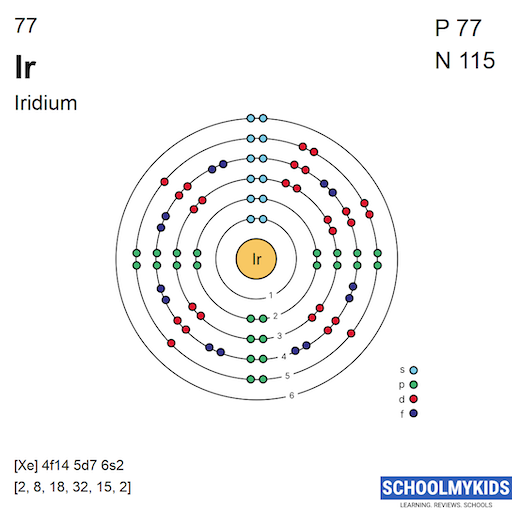
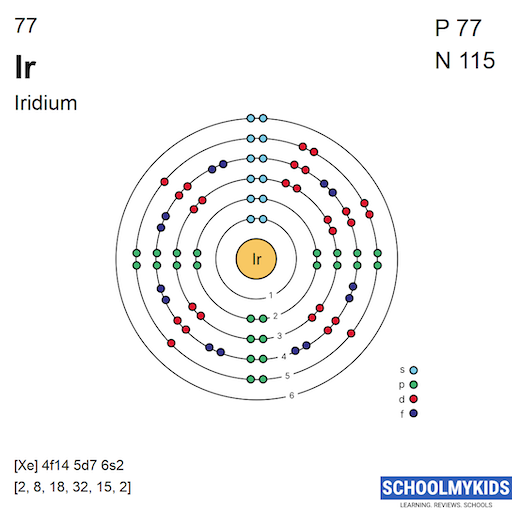
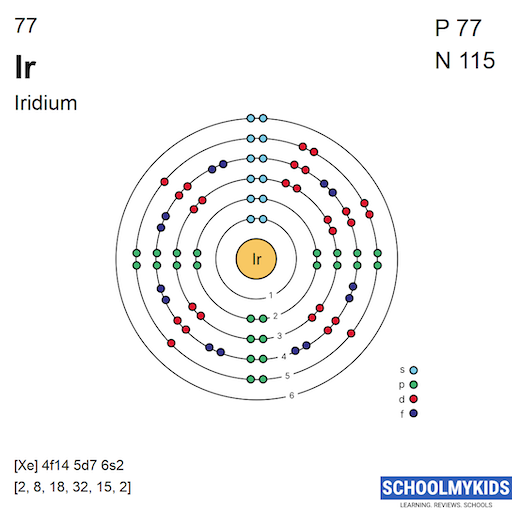
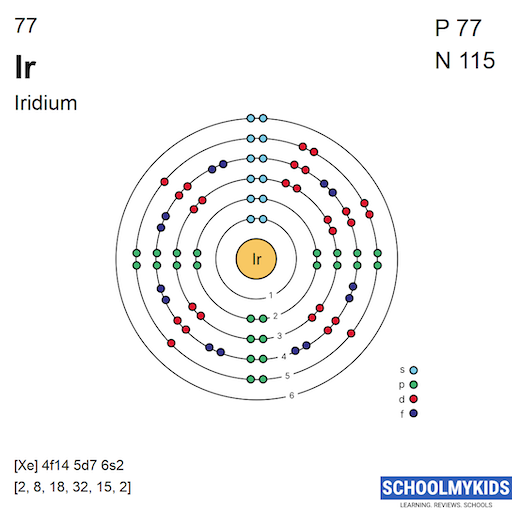

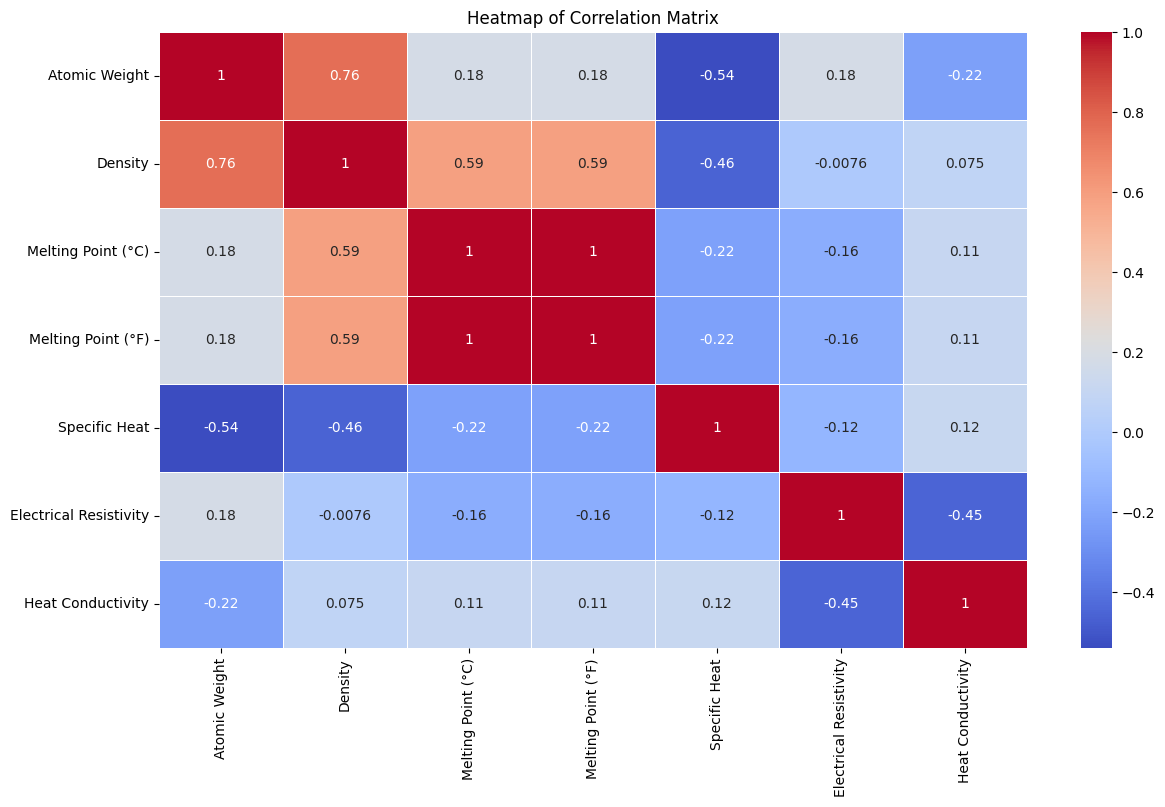

In [21]:
# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()